In [1]:
#import libraries
import os
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

default_log_name='data_validation.log'
onboarded_dir='../../data/onboarded/'
onboarded_file='RRB-Met-data_finalized.csv'
le = LabelEncoder()

In [2]:
# read dataset
df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))
df.shape

(1149, 26)

### Describe Dataset

In [3]:
df.head()

,Subject,Age,Gender,Ethnicity_1,BMI,Group,Group2,Visit,TX,Time,...,b_Glc,b_Ins,LogTG,LogGLU,LogIns,HOMA_T0,TG24,GLU24,INS24,HOMA_T24
0,RRB23112,25,M,CAU,20.610384,R,R,PPD 3,control,0.0,...,90.5,2.66,1.838282,1.956649,0.424882,0.594395,82.36,95.96,6.19,1.466648
1,RRB23112,25,M,CAU,20.610384,R,R,PPD 3,control,0.5,...,90.5,2.66,1.839352,2.133379,1.468643,0.594395,82.36,95.96,6.19,1.466648
2,RRB23112,25,M,CAU,20.610384,R,R,PPD 3,control,1.0,...,90.5,2.66,1.896747,1.921062,1.366983,0.594395,82.36,95.96,6.19,1.466648
3,RRB23112,25,M,CAU,20.610384,R,R,PPD 3,control,2.0,...,90.5,2.66,1.985651,1.884512,1.297979,0.594395,82.36,95.96,6.19,1.466648
4,RRB23112,25,M,CAU,20.610384,R,R,PPD 3,control,3.0,...,90.5,2.66,2.079977,1.914660,0.923244,0.594395,82.36,95.96,6.19,1.466648


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subject      1149 non-null   object 
 1   Age          1149 non-null   int64  
 2   Gender       1149 non-null   object 
 3   Ethnicity_1  1149 non-null   object 
 4   BMI          1149 non-null   float64
 5   Group        1149 non-null   object 
 6   Group2       1149 non-null   object 
 7   Visit        1149 non-null   object 
 8   TX           1149 non-null   object 
 9   Time         1149 non-null   float64
 10  PreDM        1149 non-null   object 
 11  PreDM2       1149 non-null   object 
 12  TG           1145 non-null   float64
 13  Glc          1145 non-null   float64
 14  Insulin      1145 non-null   float64
 15  b_TG         1145 non-null   float64
 16  b_Glc        1145 non-null   float64
 17  b_Ins        1145 non-null   float64
 18  LogTG        1145 non-null   float64
 19  LogGLU

In [5]:
df.isnull().sum()

Subject         0
Age             0
Gender          0
Ethnicity_1     0
BMI             0
Group           0
Group2          0
Visit           0
TX              0
Time            0
PreDM           0
PreDM2          0
TG              4
Glc             4
Insulin         4
b_TG            4
b_Glc           4
b_Ins           4
LogTG           4
LogGLU          4
LogIns          4
HOMA_T0         4
TG24           15
GLU24          15
INS24          15
HOMA_T24       15
dtype: int64

In [6]:
df.describe()

,Age,BMI,Time,TG,Glc,Insulin,b_TG,b_Glc,b_Ins,LogTG,LogGLU,LogIns,HOMA_T0,TG24,GLU24,INS24,HOMA_T24
count,1149.000000,1149.000000,1149.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,34.456919,27.909711,5.535248,123.219131,110.051245,39.427664,93.722210,104.489913,9.708070,2.029030,2.034089,1.354435,2.601354,106.525864,107.059347,12.697240,3.503563
std,11.762795,5.867920,6.050587,70.825969,20.938797,45.888789,53.709656,10.184032,6.467947,0.227124,0.080212,0.476077,1.843102,55.875450,10.193061,9.842626,3.123599
min,20.000000,18.500000,0.000000,31.100000,62.770000,1.340000,33.690000,81.330000,1.590000,1.492760,1.797752,0.127105,0.361813,33.250000,87.330000,1.570000,0.387577
25%,25.000000,23.047568,1.000000,72.620000,95.660000,10.330000,58.050000,96.910000,4.180000,1.861056,1.980730,1.014100,0.983111,70.420000,99.560000,6.140000,1.466648
50%,29.000000,27.199551,4.000000,100.460000,106.870000,23.930000,77.750000,104.850000,8.490000,2.001993,2.028856,1.378943,2.260093,83.200000,106.860000,9.900000,2.575868
75%,43.000000,32.570000,6.500000,152.930000,121.310000,50.200000,112.740000,112.770000,13.740000,2.184493,2.083897,1.700704,3.657510,140.080000,114.850000,18.380000,4.874418
max,60.000000,42.700000,24.000000,441.450000,199.930000,327.840000,339.960000,131.000000,31.220000,2.644882,2.300878,2.515662,8.421691,283.360000,141.600000,68.270000,23.869215


### Label encode some columns

In [7]:
# function to check unique values in each column and label encode them
def check_unique_values(df):
    for col in df.columns:
        if df[col].nunique() < 10:
            df[col] = le.fit_transform(df[col])

    return df

dff = check_unique_values(df)

In [8]:
dff.head()

,Subject,Age,Gender,Ethnicity_1,BMI,Group,Group2,Visit,TX,Time,...,b_Glc,b_Ins,LogTG,LogGLU,LogIns,HOMA_T0,TG24,GLU24,INS24,HOMA_T24
0,RRB23112,25,1,4,20.610384,1,1,2,2,0.0,...,90.5,2.66,1.838282,1.956649,0.424882,0.594395,82.36,95.96,6.19,1.466648
1,RRB23112,25,1,4,20.610384,1,1,2,2,0.5,...,90.5,2.66,1.839352,2.133379,1.468643,0.594395,82.36,95.96,6.19,1.466648
2,RRB23112,25,1,4,20.610384,1,1,2,2,1.0,...,90.5,2.66,1.896747,1.921062,1.366983,0.594395,82.36,95.96,6.19,1.466648
3,RRB23112,25,1,4,20.610384,1,1,2,2,2.0,...,90.5,2.66,1.985651,1.884512,1.297979,0.594395,82.36,95.96,6.19,1.466648
4,RRB23112,25,1,4,20.610384,1,1,2,2,3.0,...,90.5,2.66,2.079977,1.914660,0.923244,0.594395,82.36,95.96,6.19,1.466648


### Normalize

In [9]:
dff = dff.drop('Subject', axis=1)

# Normalize the DataFrame
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)


### Correlation matrix

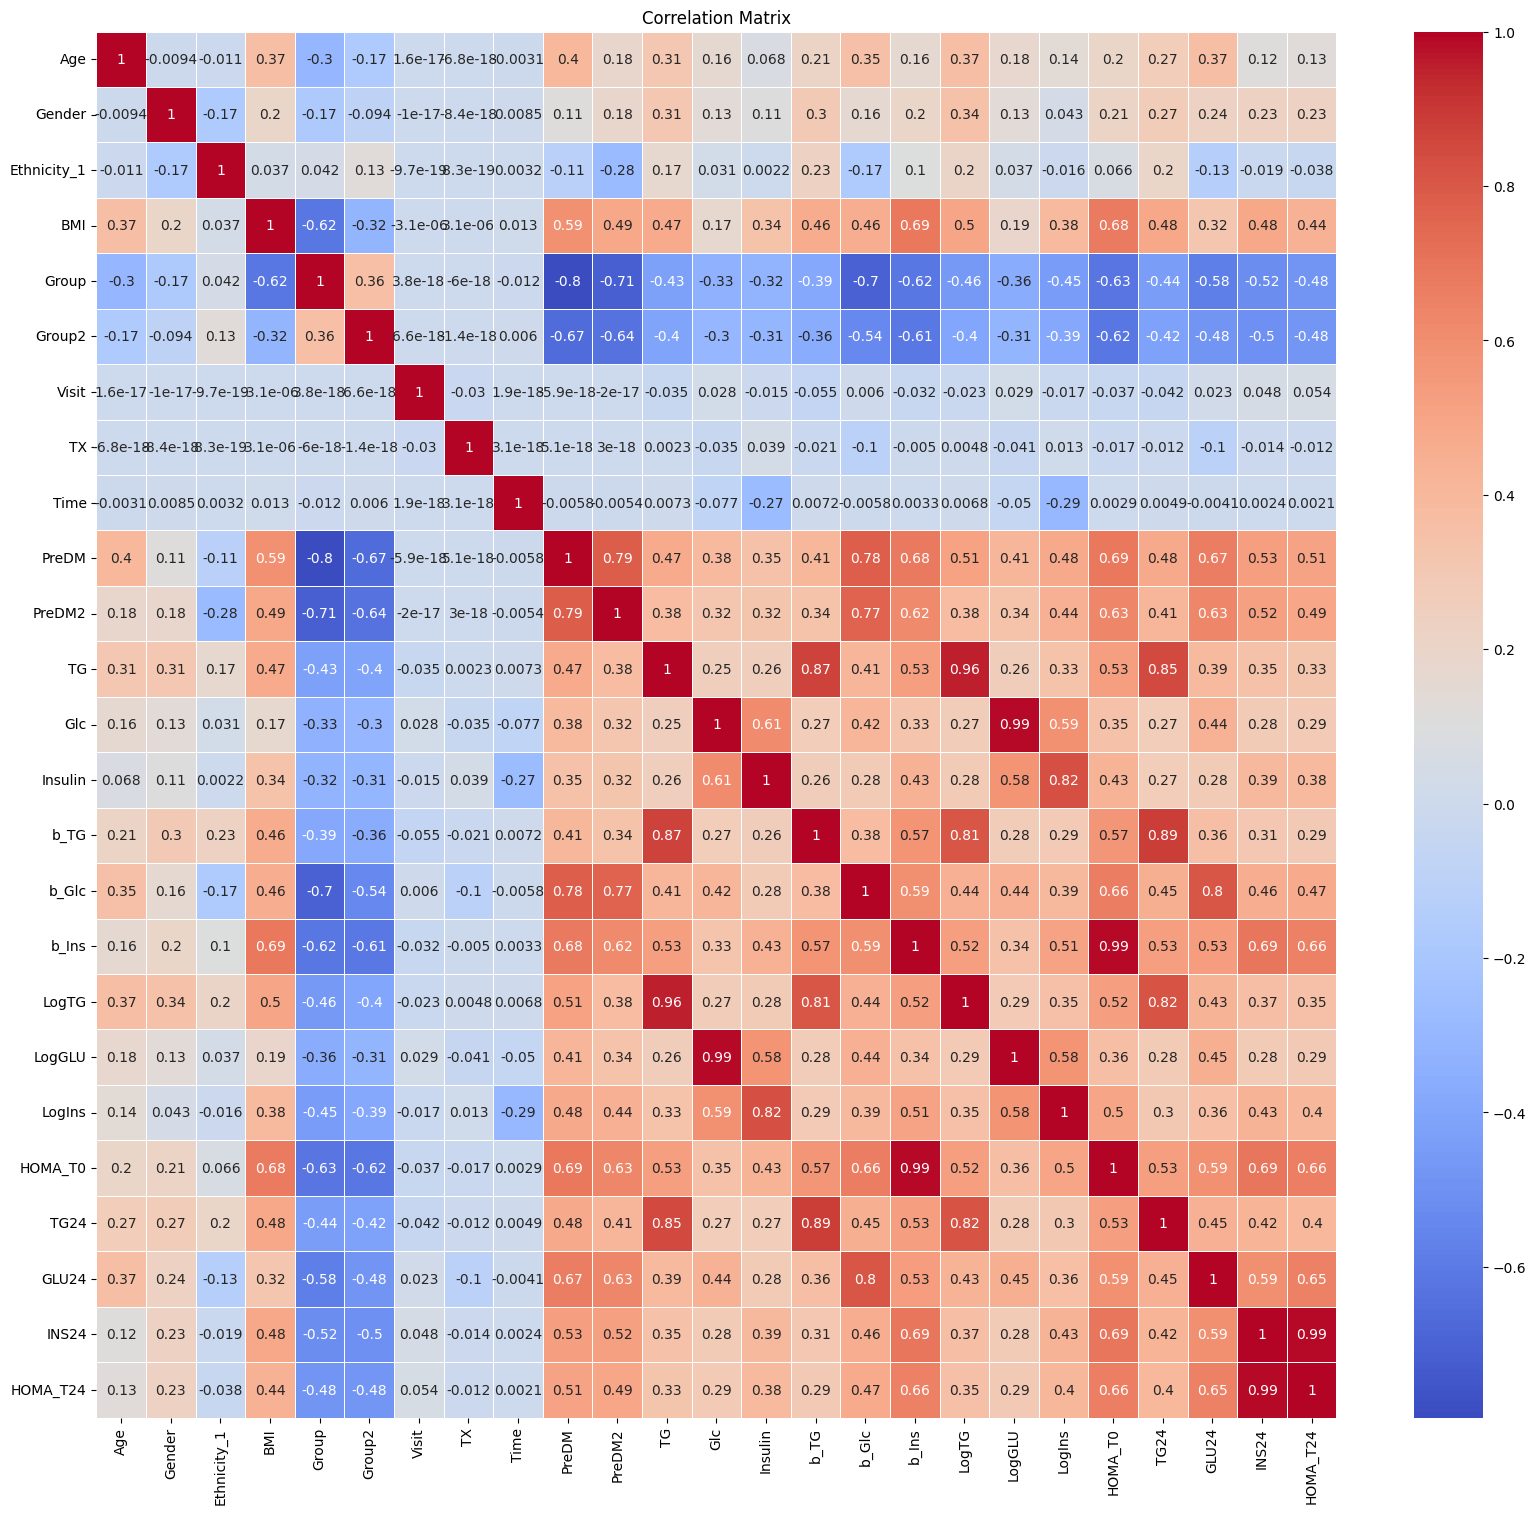

In [11]:
# function to calculate correlation matrix and plot it
def visualize_correlation_matrix(correlation_matrix):
    # Create a heatmap using seaborn
    plt.figure(figsize=(20, 18))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

# Calculate correlation matrix
correlation_matrix = normalized_df.corr()
# visualize
visualize_correlation_matrix(correlation_matrix)


### opinion
- Visit, TX, Time doesnt have much affect
- b_glc  highly correlated to PreDM
- Homa_To highly correlated to b-ins